# Projet IA - MGL869
## Import du jeu de données

In [2]:
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv", dtype={
  'Gender':'category',
  'CAEC':'category',
  'CALC':'category',
  'MTRANS':'category',
  'NObeyesdad':'category',
})
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


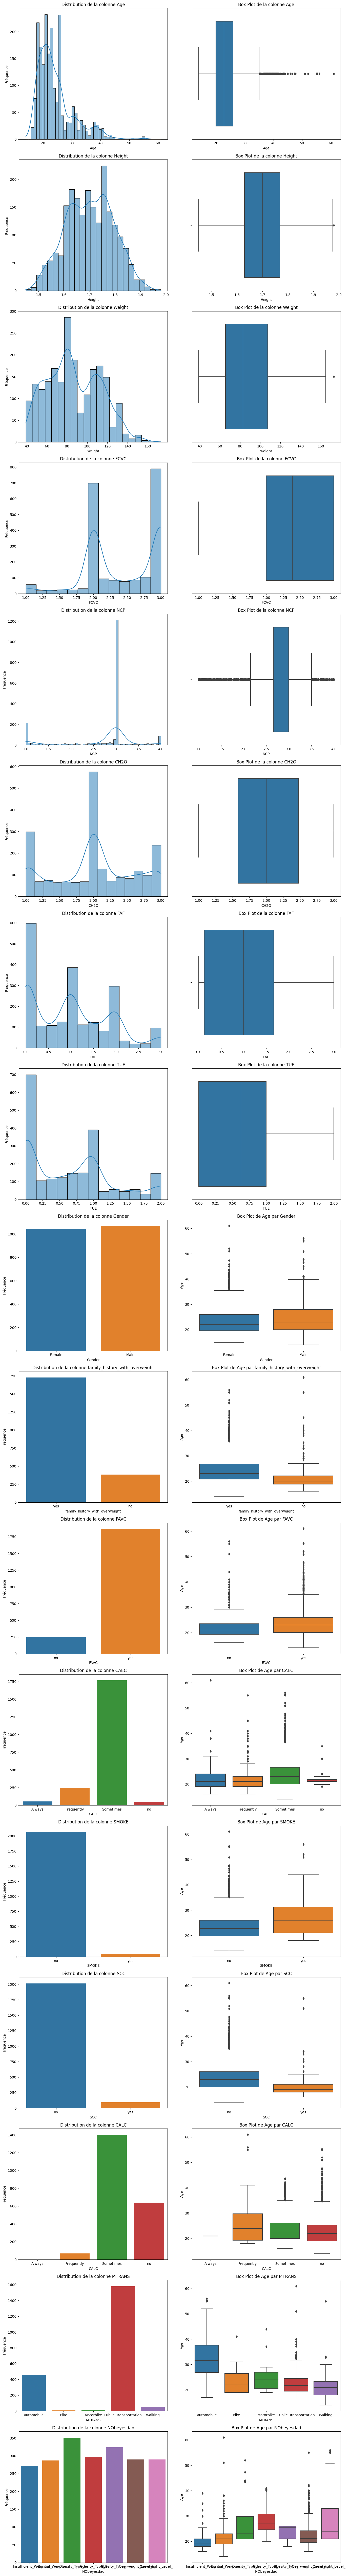

In [5]:
def plot_distributions(dataframe):
    num_cols = dataframe.select_dtypes(include=["float64", "int64"]).columns
    cat_cols = dataframe.select_dtypes(include=["object", "category"]).columns

    total_plots = len(num_cols) + len(cat_cols)
    fig, axes = plt.subplots(total_plots, 2, figsize=(14, 6 * total_plots))

    if total_plots == 1:
        axes = [axes]

    plot_idx = 0
    for col in num_cols:
        sns.histplot(dataframe[col], kde=True, ax=axes[plot_idx][0])
        axes[plot_idx][0].set_title(f"Distribution de la colonne {col}")
        axes[plot_idx][0].set_xlabel(col)
        axes[plot_idx][0].set_ylabel("Fréquence")

        sns.boxplot(x=dataframe[col], ax=axes[plot_idx][1])
        axes[plot_idx][1].set_title(f"Box Plot de la colonne {col}")
        axes[plot_idx][1].set_xlabel(col)

        plot_idx += 1

    for col in cat_cols:
        sns.countplot(x=dataframe[col], ax=axes[plot_idx][0])
        axes[plot_idx][0].set_title(f"Distribution de la colonne {col}")
        axes[plot_idx][0].set_xlabel(col)
        axes[plot_idx][0].set_ylabel("Fréquence")

    
        if len(num_cols) > 0:
            sns.boxplot(
                x=dataframe[col], y=dataframe[num_cols[0]], ax=axes[plot_idx][1]
            )
            axes[plot_idx][1].set_title(f"Box Plot de {num_cols[0]} par {col}")
            axes[plot_idx][1].set_xlabel(col)
            axes[plot_idx][1].set_ylabel(num_cols[0])
        else:
            axes[plot_idx][1].text(
                0.5,
                0.5,
                "Pas de données numériques disponibles",
                horizontalalignment="center",
                verticalalignment="center",
                transform=axes[plot_idx][1].transAxes,
            )
            axes[plot_idx][1].set_title(f"Box Plot de {col}")
            axes[plot_idx][1].set_xlabel(col)
            axes[plot_idx][1].set_ylabel("Valeurs")

        plot_idx += 1

    plt.tight_layout()
    plt.show()


plot_distributions(df)

### Supprimer valeurs manquantess

In [772]:
df.dropna(inplace=True)

## Préparation du jeu de données
### Création d'un nouveau df

In [773]:
df2 = df.copy()

### Transformation colonne numerique en colonne categorielle

In [774]:
df2["family_history_with_overweight"] = df["family_history_with_overweight"].apply(lambda v: v == "yes")
df2["FAVC"] = df["FAVC"].apply(lambda v: v == "yes")
df2["SMOKE"] = df["SMOKE"].apply(lambda v: v == "yes")
df2["SCC"] = df["SCC"].apply(lambda v: v == "yes")


### Rapport sur les données numériques

In [775]:
df2.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Age

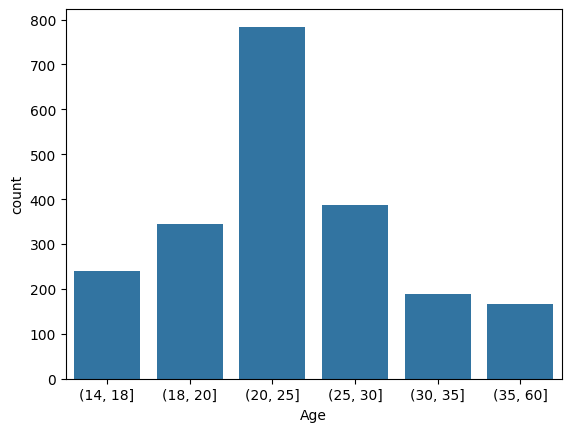

In [776]:
interval = (14,18, 20, 25, 30, 35, 60)
df2["Age"] = pd.cut(df2['Age'], interval)
sns.countplot(data=df2, x='Age')
plt.show()

### Taille

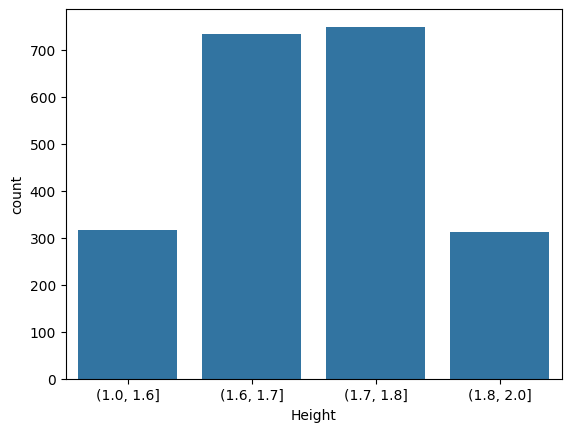

In [777]:
interval = (1,1.6,1.70, 1.80,2)
df2["Height"] = pd.cut(df2['Height'], interval)
sns.countplot(data=df2, x='Height')
plt.show()

### Poids

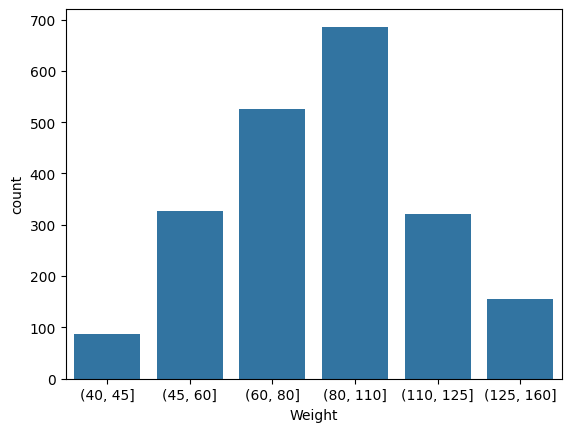

In [778]:
interval = (40,45,60,80,110, 125,160)
df2["Weight"] = pd.cut(df2['Weight'], interval)
sns.countplot(data=df2, x='Weight')
plt.show()

### NCP
Je pense que NCP est inutile car il y a majoritairement qu'une seule valeur.

NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: count, Length: 635, dtype: int64
NCP
Three              1203
Between 1 y 2       199
More than three      69
Name: count, dtype: int64


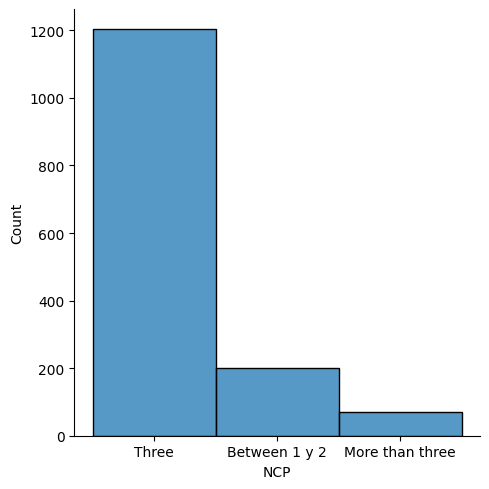

In [779]:
print(df2['NCP'].value_counts())
map_dict = {1.0: 'Between 1 y 2', 3.0: 'Three', 4.0: 'More than three'}
df2 = df2[df2['NCP'].isin(map_dict.keys())]
df2['NCP'] = df2['NCP'].replace(map_dict)

print(df2['NCP'].value_counts())
sns.displot(df2['NCP'])
plt.show()

### FCVC

FCVC
3.000000    581
2.000000    463
1.000000     32
2.442536      2
2.392665      2
           ... 
2.951591      1
2.661556      1
2.512719      1
2.417635      1
1.841990      1
Name: count, Length: 392, dtype: int64
FCVC
Always       581
Sometimes    463
Never         32
Name: count, dtype: int64


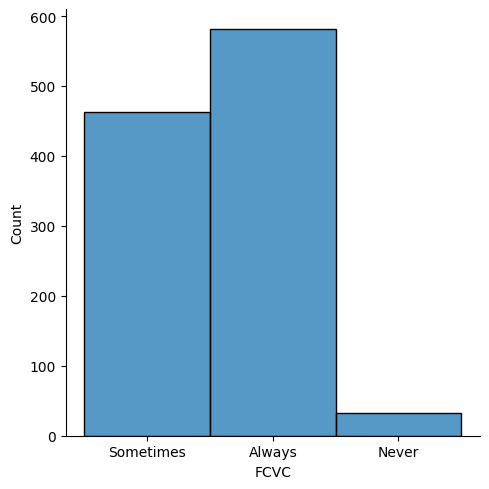

In [780]:
print(df2['FCVC'].value_counts())
map_dict = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
df2 = df2[df2['FCVC'].isin(map_dict.keys())]
df2['FCVC'] = df2['FCVC'].replace(map_dict)

print(df2['FCVC'].value_counts())
sns.displot(df2['FCVC'])
plt.show()


#### CH2O

CH2O
2.000000    321
1.000000    151
3.000000    136
2.843777      2
2.852339      1
           ... 
1.759803      1
1.440526      1
1.613829      1
1.234943      1
2.863513      1
Name: count, Length: 470, dtype: int64
CH2O
1L< X <2 L    321
< 1L          151
> 2 L         136
Name: count, dtype: int64


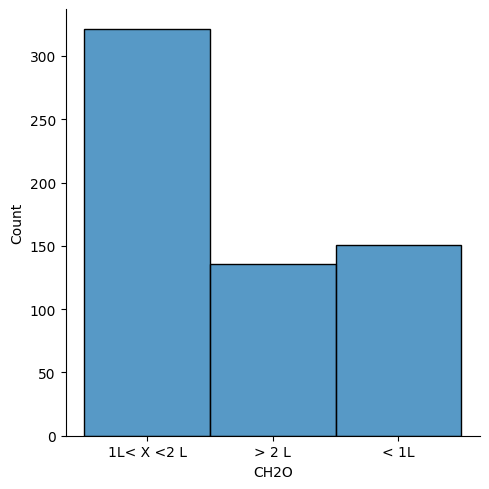

In [781]:
print(df2['CH2O'].value_counts())
map_dict = {1: '< 1L', 2: '1L< X <2 L', 3: '> 2 L'}
df2 = df2[df2['CH2O'].isin(map_dict.keys())]
df2['CH2O'] = df2['CH2O'].replace(map_dict)

print(df2['CH2O'].value_counts())
sns.displot(df2['CH2O'])
plt.show()


### FAF - How often do you have physical activity? 

FAF
0.000000    183
1.000000    173
2.000000    115
3.000000     72
1.783858      1
           ... 
2.721646      1
2.939733      1
2.040816      1
2.847761      1
1.467863      1
Name: count, Length: 69, dtype: int64
FAF
No        183
1 or 2    173
2 or 4    115
4 or 5     72
Name: count, dtype: int64


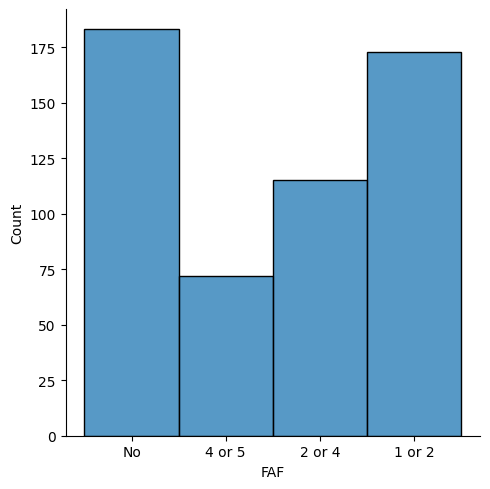

In [782]:
print(df2['FAF'].value_counts())
map_dict = {0: 'No',1: '1 or 2', 2: '2 or 4', 3: '4 or 5'}
df2 = df2[df2['FAF'].isin(map_dict.keys())]
df2['FAF'] = df2['FAF'].replace(map_dict)

print(df2['FAF'].value_counts())
sns.displot(df2['FAF'])
plt.show()

### TUE - How much time do you use technological devices such as cell phone, videogames, television, computer and others?

TUE
0.000000    267
1.000000    181
2.000000     83
1.593704      1
1.329237      1
1.525597      1
1.339232      1
1.112489      1
0.018877      1
1.301385      1
1.481890      1
0.105936      1
0.233314      1
1.014808      1
0.931721      1
Name: count, dtype: int64
TUE
0-2 hours            267
3-5 hour             181
More than 5 hours     83
Name: count, dtype: int64


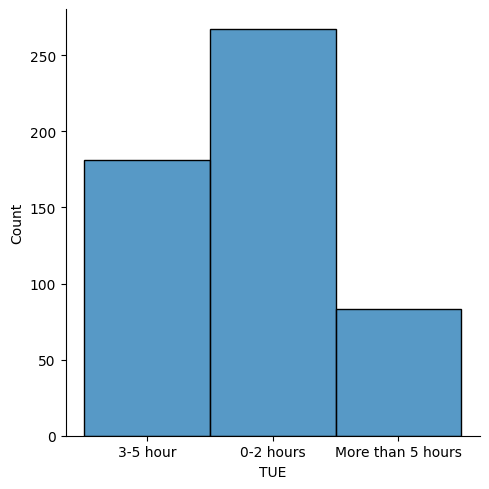

In [783]:
print(df2['TUE'].value_counts())
map_dict = {0: '0-2 hours',1: '3-5 hour', 2: 'More than 5 hours'}
df2 = df2[df2['TUE'].isin(map_dict.keys())]
df2['TUE'] = df2['TUE'].replace(map_dict)

print(df2['TUE'].value_counts())
sns.displot(df2['TUE'])
plt.show()

On tranforme les colonnes categories en plusieurs colonnes booleenes.

In [784]:
df2 = pd.get_dummies(df2, dtype=bool)

### Apercu des données traitées

In [785]:
df2

,family_history_with_overweight,FAVC,SMOKE,SCC,Gender_Female,Gender_Male,"Age_(14, 18]","Age_(18, 20]","Age_(20, 25]","Age_(25, 30]",...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,True,False,False,False,True,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
1,True,False,True,True,True,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
2,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1405,True,True,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
1406,True,True,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
1426,True,True,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False


#### 

In [786]:
df2.dtypes

family_history_with_overweight    bool
FAVC                              bool
SMOKE                             bool
SCC                               bool
Gender_Female                     bool
Gender_Male                       bool
Age_(14, 18]                      bool
Age_(18, 20]                      bool
Age_(20, 25]                      bool
Age_(25, 30]                      bool
Age_(30, 35]                      bool
Age_(35, 60]                      bool
Height_(1.0, 1.6]                 bool
Height_(1.6, 1.7]                 bool
Height_(1.7, 1.8]                 bool
Height_(1.8, 2.0]                 bool
Weight_(40, 45]                   bool
Weight_(45, 60]                   bool
Weight_(60, 80]                   bool
Weight_(80, 110]                  bool
Weight_(110, 125]                 bool
Weight_(125, 160]                 bool
FCVC_Always                       bool
FCVC_Never                        bool
FCVC_Sometimes                    bool
NCP_Between 1 y 2        

## Entrainement


In [787]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


### Partionnement des données

In [788]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X = df2.iloc[:, :-7]
y = df2.iloc[:, -7:]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


### Modele

In [789]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)

### GridSearch

In [790]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]})

### Evaluation

In [791]:
y_val_pred = grid_search.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.5660377358490566


## Utilisation de NN

Epoch 1/50


C:\Users\mattd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1995 - loss: 4.0944 - val_accuracy: 0.3019 - val_loss: 3.7681
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2295 - loss: 3.8984 - val_accuracy: 0.5000 - val_loss: 3.5745
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3878 - loss: 3.6267 - val_accuracy: 0.5189 - val_loss: 3.4354
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4773 - loss: 3.5258 - val_accuracy: 0.5189 - val_loss: 3.3368
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5083 - loss: 3.3619 - val_accuracy: 0.5189 - val_loss: 3.2455
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5262 - loss: 3.2651 - val_accuracy: 0.5189 - val_loss: 3.1630
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5315 - loss: 3.1813 - val_accuracy: 0.5189 - val_loss: 3.0809
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5444 - loss: 3.1272 - val_accuracy: 0.5189 - val_loss: 3.0072
Ep

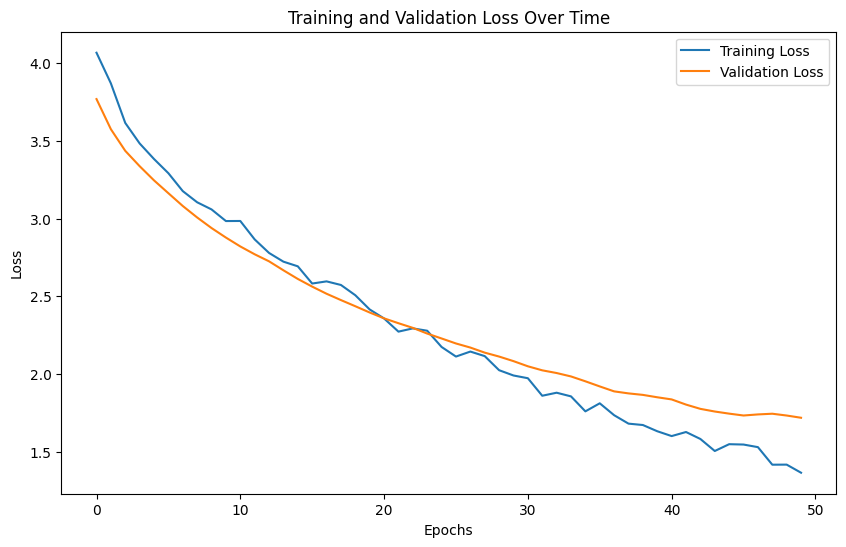

In [792]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np

# Séparer les données en ensembles d'entraînement, de test et de validation
X = df2.iloc[:, :-7]
y = df2.iloc[:, -7:]

# Normaliser les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Créer un modèle de réseau de neurones plus complexe
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle et conserver l'historique des pertes
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_val, y_val))

# Évaluer le modèle
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')

# Prédire les labels pour l'ensemble de validation
y_val_pred = model.predict(X_val)

# Convertir les prédictions en labels
y_val_pred = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val.values, axis=1)

# Calculer la matrice de confusion
confusion = confusion_matrix(y_val_true, y_val_pred)

print(f'Confusion Matrix: \n{confusion}')

# Visualiser la fonction de perte
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [793]:
# Évaluer le modèle
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5914 - loss: 1.8115 
Validation Accuracy: 0.6320754885673523
